<a href="https://colab.research.google.com/github/amalsalilan/DataInsight_Sales_Data_Analysis_and_Visualization_Infosys_Internship_Dec2024/blob/Shreya_Reddy_Alumala/Walmart(prophet_model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving walmart Retail Data.xlsx to walmart Retail Data.xlsx


In [ ]:
data=pd.read_excel('walmart Retail Data.xlsx')
df=data[['Order Date','Sales']]

In [ ]:
df.isnull().sum()

,0
Order Date,0
Sales,0


In [ ]:
df_prophet = df[['Order Date', 'Sales']].copy()
df_prophet.rename(columns={'Order Date': 'ds', 'Sales': 'y'}, inplace=True)
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

In [ ]:
# Aggregating sales data on a weekly basis
df_weekly = df_prophet.resample('W-MON', on='ds').sum().reset_index()

# Display the aggregated weekly data
df_weekly.head()

,ds,y
0,2012-01-02,12154.7100
1,2012-01-09,184082.3865
2,2012-01-16,104938.8405
3,2012-01-23,117531.9835
4,2012-01-30,78733.4990


In [ ]:
split_point = int(len(df_weekly) * 0.8)  # 80% for training

train_data = df_weekly.iloc[:split_point]
test_data = df_weekly.iloc[split_point:]

# Display the range of dates for training and testing sets
train_date_range = (train_data['ds'].min(), train_data['ds'].max())
test_date_range = (test_data['ds'].min(), test_data['ds'].max())

train_date_range, test_date_range

((Timestamp('2012-01-02 00:00:00'), Timestamp('2015-03-16 00:00:00')),
 (Timestamp('2015-03-23 00:00:00'), Timestamp('2016-01-04 00:00:00')))

In [ ]:
train_date_range

(Timestamp('2012-01-02 00:00:00'), Timestamp('2015-03-16 00:00:00'))

In [ ]:
test_date_range

(Timestamp('2015-03-23 00:00:00'), Timestamp('2016-01-04 00:00:00'))

In [ ]:
from prophet import Prophet

# Initialize the Prophet model
model = Prophet()

# Fit the model on the training data
model.fit(train_data)

# Create a DataFrame for future predictions (including the test period)
future = model.make_future_dataframe(periods=12, freq='W-MON')

# Generate forecasts
forecast = model.predict(future)

# Display the forecasted data
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_eywmt4/wu2m73w5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_eywmt4/3fh4rg79.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89468', 'data', 'file=/tmp/tmpx_eywmt4/wu2m73w5.json', 'init=/tmp/tmpx_eywmt4/3fh4rg79.json', 'output', 'file=/tmp/tmpx_eywmt4/prophet_modelq4qm9um_/prophet_model-20250116152530.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:25:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:25:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
175,2015-05-11,53422.309647,18926.965975,90221.917738
176,2015-05-18,50931.211416,16877.558851,86282.512278
177,2015-05-25,51926.194130,15676.114327,86825.625135
178,2015-06-01,50672.042226,16125.877670,87629.270092
179,2015-06-08,45396.977748,11235.959931,82966.660725


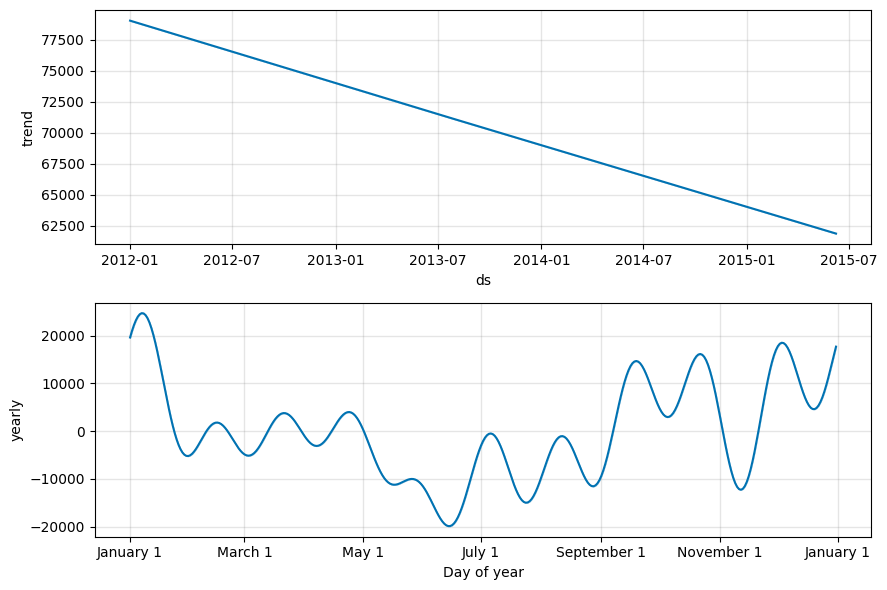

In [ ]:
# test_data

fig = model.plot_components(forecast)
plt.show()

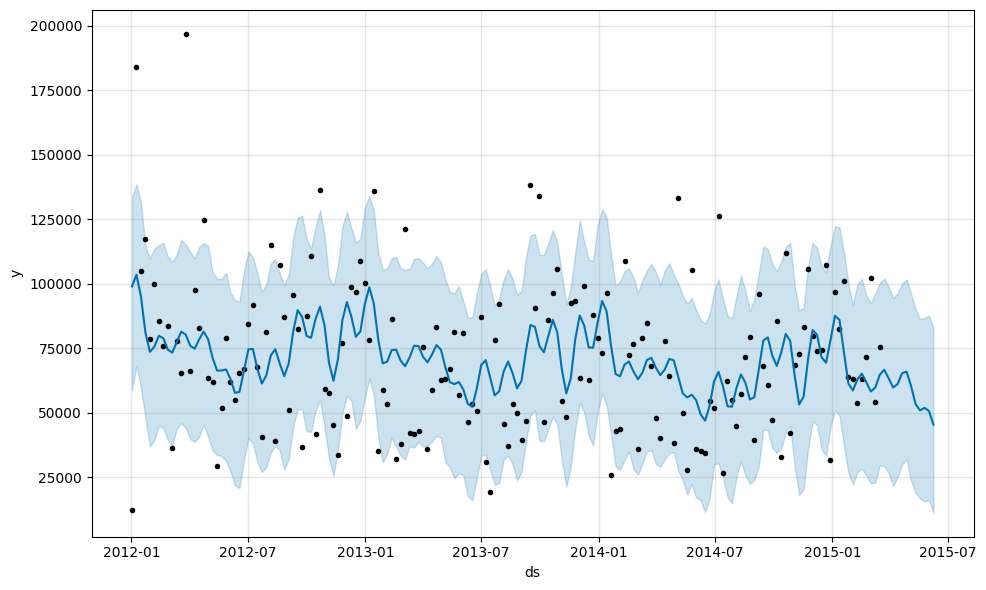

In [ ]:
# Plot the forecast
fig = model.plot(forecast)
fig.show()

# Plot the forecast components (trend, seasonality)
# fig_components = model.plot_components(forecast)
# fig_components.show()

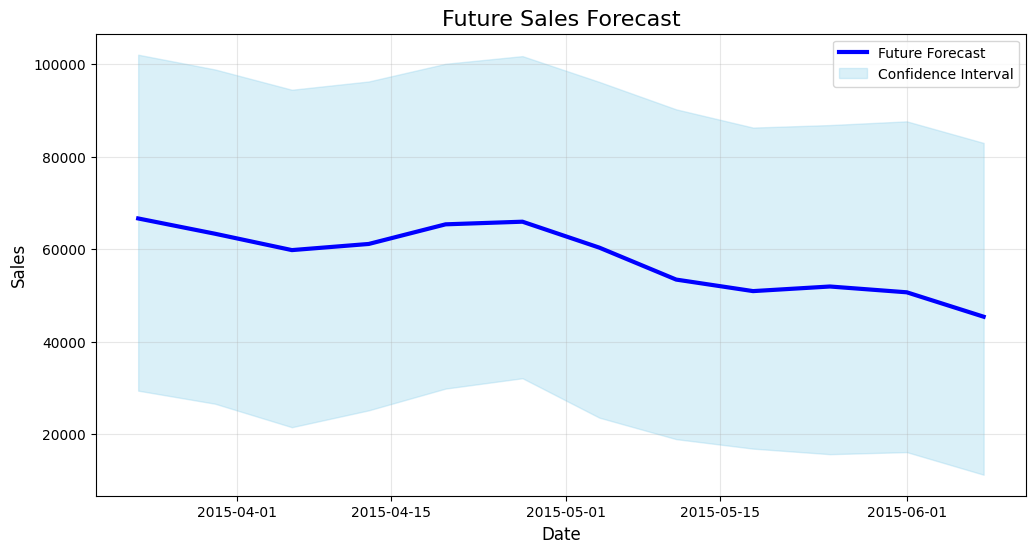

In [ ]:
# Filter only future forecasted data
future_forecast = forecast[forecast['ds'] > train_data['ds'].max()]

# Check if future_forecast is empty
if future_forecast.empty:
    print("No future data available for plotting. Please check the filtering logic.")
else:
    # Plot the future forecast
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot the forecasted future line
    ax.plot(
        future_forecast['ds'],
        future_forecast['yhat'],
        label='Future Forecast',
        color='blue',
        linewidth=3,
        linestyle='-'
    )

    # Highlight confidence intervals for the future forecast
    ax.fill_between(
        future_forecast['ds'],
        future_forecast['yhat_lower'],
        future_forecast['yhat_upper'],
        color='skyblue',
        alpha=0.3,
        label='Confidence Interval'
    )

    # Add labels, legend, and grid
    ax.set_title('Future Sales Forecast', fontsize=16)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Sales', fontsize=12)
    ax.legend(fontsize=10)
    ax.grid(alpha=0.3)

    # Display the plot
    plt.show()

Enter the number of weeks to forecast: 12
            ds          yhat    yhat_lower     yhat_upper
168 2015-03-23  66639.017722  29656.742922  103268.415845
169 2015-03-30  63331.842756  28118.422362   98404.949412
170 2015-04-06  59795.614871  25418.617461   94204.573883
171 2015-04-13  61124.694954  26090.143935   95636.556633
172 2015-04-20  65367.984280  30373.576498  100960.414132
173 2015-04-27  65936.488579  28461.831708  101285.289393
174 2015-05-04  60328.529927  25724.536402   94861.571149
175 2015-05-11  53422.309647  16350.242413   89575.659366
176 2015-05-18  50931.211416  15368.266215   85324.495688
177 2015-05-25  51926.194130  15271.706071   88484.046683
178 2015-06-01  50672.042226  15729.608751   85151.700827
179 2015-06-08  45396.977748  12955.950217   83884.238852


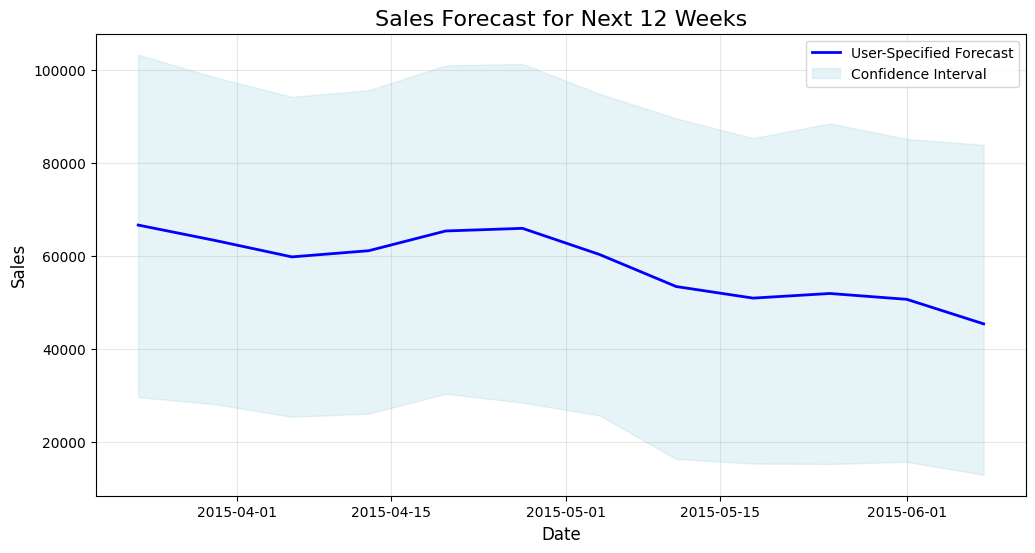

In [ ]:
# User input for forecasting
import datetime

# Ask the user for the future date or weeks to forecast
input_weeks = int(input("Enter the number of weeks to forecast: "))

# Generate a future DataFrame based on user input
future = model.make_future_dataframe(periods=input_weeks, freq='W-MON')

# Predict future sales
forecast = model.predict(future)

# Filter forecast data for user-defined range
last_date = train_data['ds'].max()
future_forecast = forecast[forecast['ds'] > last_date]

# Display future forecast
print(future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

# Plot the future forecast
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the forecasted line
ax.plot(
    future_forecast['ds'],
    future_forecast['yhat'],
    label='User-Specified Forecast',
    color='blue',
    linewidth=2
    )

# Highlight confidence intervals
ax.fill_between(
    future_forecast['ds'],
    future_forecast['yhat_lower'],
    future_forecast['yhat_upper'],
    color='lightblue',
    alpha=0.3,
    label='Confidence Interval'
)

# Add labels, legend, and grid
ax.set_title(f"Sales Forecast for Next {input_weeks} Weeks", fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Sales', fontsize=12)
ax.legend(fontsize=10)
ax.grid(alpha=0.3)

plt.show()


In [ ]:
from joblib import dump

# Save the trained Prophet model
dump(model, 'prophet_sales_model.joblib')

print("Model saved as 'prophet_sales_model.joblib'")

Model saved as 'prophet_sales_model.joblib'
